In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab

**Q1**

We must determine whether the means of the two samples differ and whether there is a statistically significant difference between them.

**Assume the hypothesis**
* Null Hypothesis:μ1 = μ2
* Alternative Hypthosis: μ1 is not equal to μ2


**Decide the cutoff**
* Significance 5%
* alpha = 0.05

**As it is a two-tailed test**
* alpha/2 = 0.025  

In [4]:
alpha = 0.025

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Cutlets.csv')
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [7]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [14]:
df[df.duplicated()]

,Unit A,Unit B


In [15]:
df[df.duplicated()].shape

(0, 2)

In [16]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

**Plotting the data**

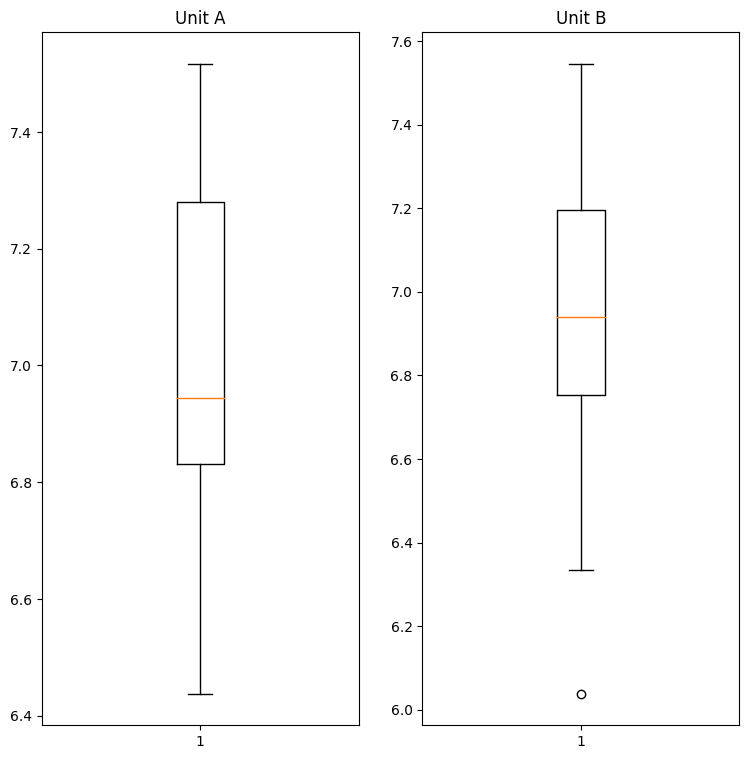

In [12]:
plt.subplots(figsize = (9,9))
plt.subplot(121)
plt.boxplot(df['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(df['Unit B'])
plt.title('Unit B')
plt.show()

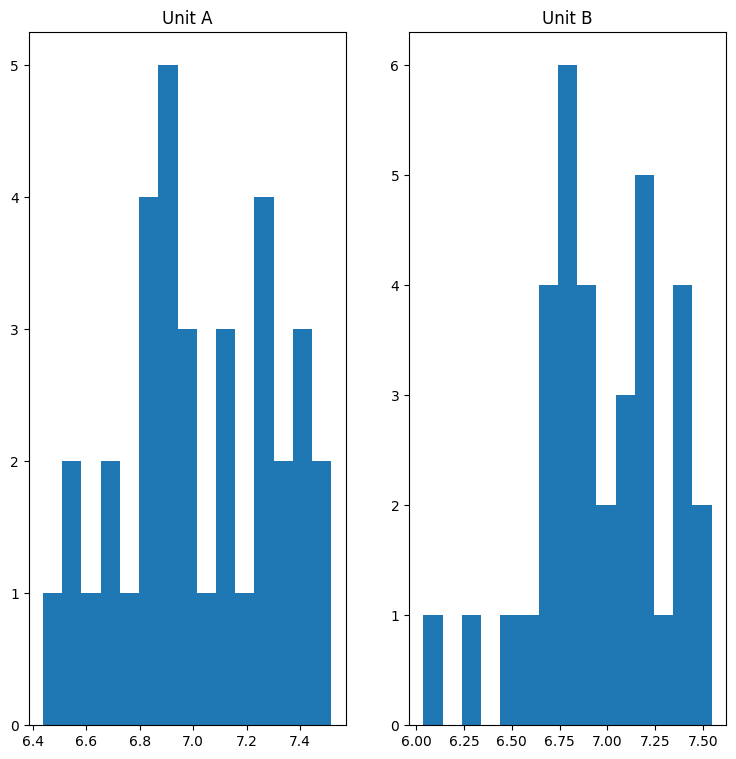

In [19]:
plt.subplots(figsize = (9,9))
plt.subplot(121)
plt.hist(df['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(df['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

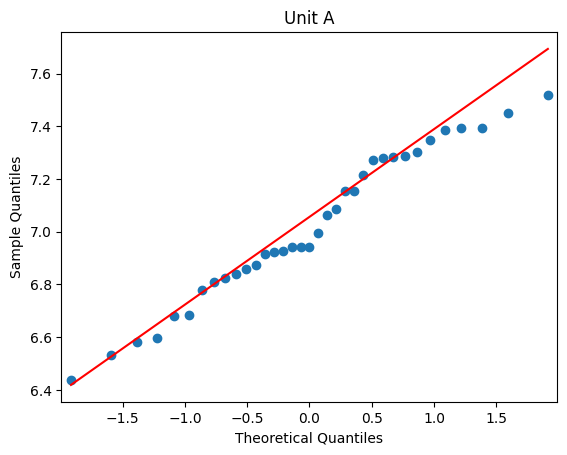

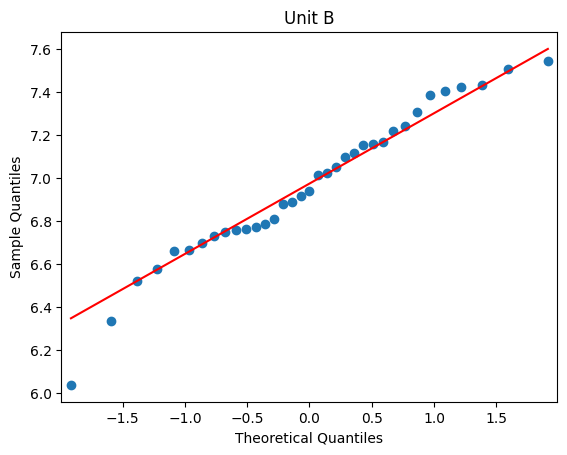

In [20]:
sm.qqplot(df["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(df["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [21]:
unitA = pd.Series(df.iloc[:,0])
unitA.head(5)

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [22]:
unitB = pd.Series(df.iloc[:,1])
unitB.head(5)

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

In [23]:
# we use 2 tail t- test
# calculate p value
p_value = stats.ttest_ind(unitA, unitB)
p_value

TtestResult(statistic=0.7228688704678063, pvalue=0.4722394724599501, df=68.0)

In [24]:
p_value[1]

0.4722394724599501

Compare p_value with 	'α'
 (Significane Level)


If p_value is not equal to 	'α'
 we failed to reject Null Hypothesis because of lack of evidence


If p_value is = 'α'
 we reject Null Hypothesis
interpreting p-value

In [25]:
alpha = 0.025
print('Significance = 0.025' , 'p = 0.472')
if p_value[1] <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significance = 0.025 p = 0.472
We fail to reject Null hypothesis


Due to insufficient evidence, we are unable to reject the null hypothesis that there is no discernible difference between the two samples.

**Q2**

**We employ the ANOVA test**


We must determine if the means of any of these samples differ or are the same.

formulate the theory
* Null Hypothesis:μ1 = μ2
* Alternate Hypothesis: Atleast one of them is different

**Decide the cutoff**


* Significance 5%
* alpha = 0.05

In [27]:
labtat = pd.read_csv('/content/drive/MyDrive/LabTAT.csv')
labtat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [28]:
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [30]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [29]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [31]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [32]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [33]:
labtat[labtat.duplicated()].shape

(0, 4)

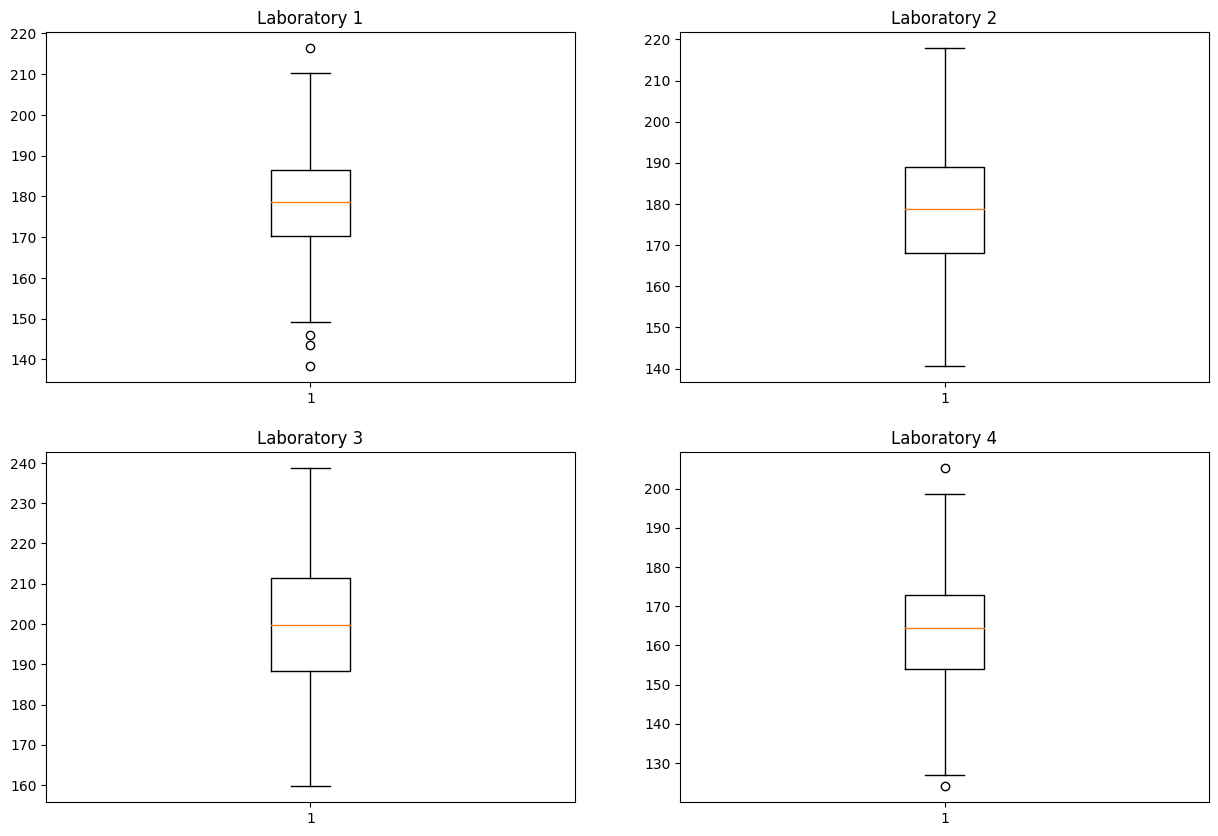

In [36]:
plt.subplots(figsize = (15,10))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

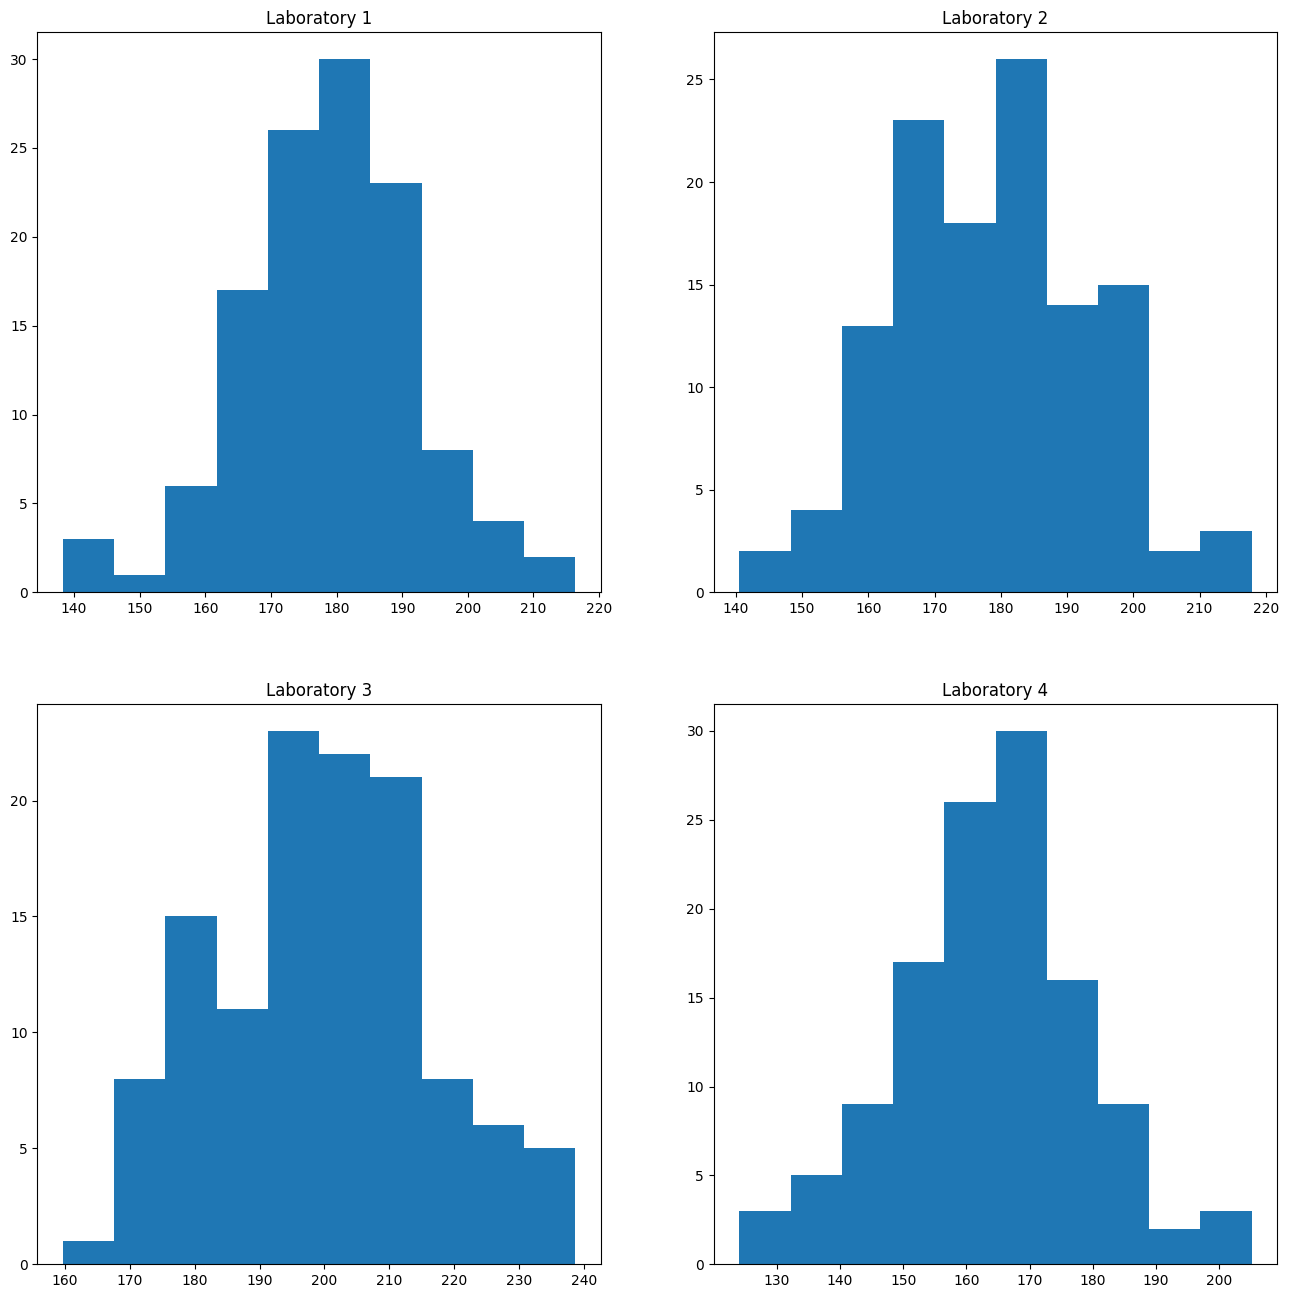

In [37]:
plt.subplots(figsize = (16,16))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

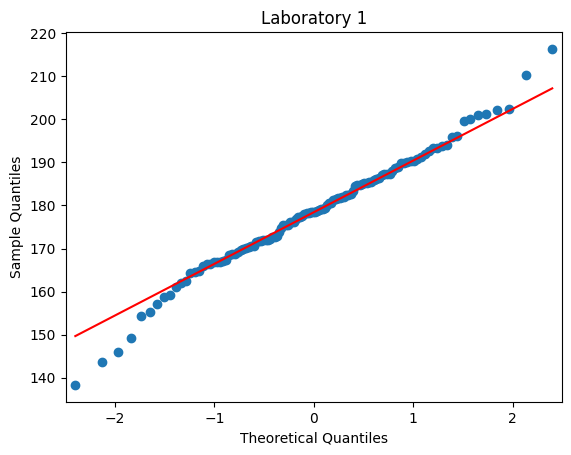

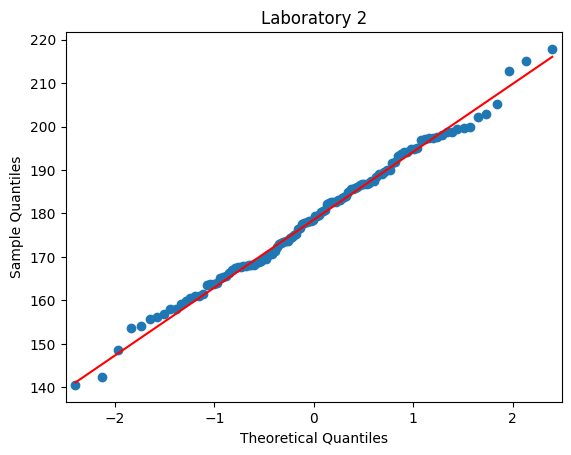

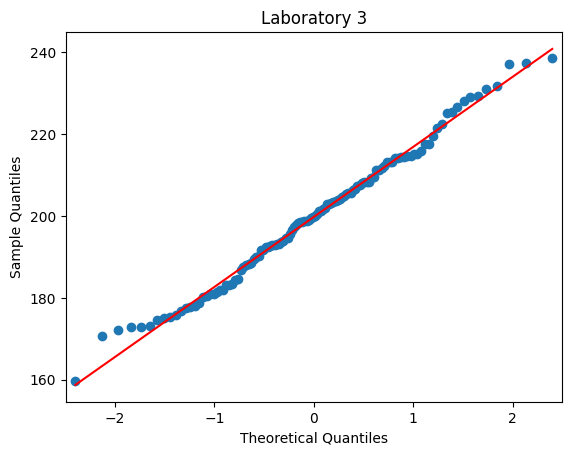

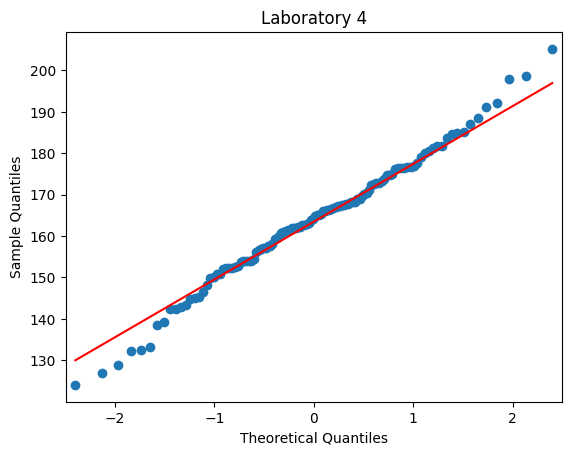

In [38]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

In [39]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
p_value

2.1156708949992414e-57

In [40]:

if p_value < 0.05:
    print('Dismiss the null hypothesis. Sample is at least distinct..')
else:
    print('Neglect the Null Hypothesis.')

Dismiss the null hypothesis. Sample is at least distinct..


**Q3**

We are going to conduct a Test of Independence using Chi-Square
 test with Contingency table

We must determine if the percentages of any of these samples are the same or different.


* **Null Hypothesis:**The buyer rations across regions based on gender do not exhibit any correlation or interdependence.
* **Alternative Hypthosis:**The gender-based buyer rations exhibit a notable correlation or interdependence among various regions.

**Decide a cut-off value**

* Significance 5%
* alpha = 0.05

As it is a one-tailed test
* alpha = 1-0.95 = 0.05


In [41]:
buyer = pd.read_csv('/content/drive/MyDrive/BuyerRatio.csv',index_col = 0)

In [42]:
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [43]:
table = [[50,142,131,70],[435,1523,1356,750]]

Applying Chi-Square
 contingency table to convert observed value into expected value

In [44]:
stat, p, dof, exp = stats.chi2_contingency(buyer)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [45]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [46]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.1175678,72.30424052,
  442.23468701, 1518.18712138, 1355.88243213,  747.69575948])

In [47]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455389659722 
 P_Value =  0.8095206647131117


**interpreting p-value**

In [48]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


**Q4**

We will use a Chi-Square test with a contingency table to perform a Test of Independence.



We must determine if the means of any of these samples are similar or different.

* Null Hypothesis:μ1 = μ2 =μ3 = μ4
* Alternate Hypothesis: Atleast one of them is different


**Decide a cut-off value**

* Significance 5%
* alpha = 0.05

In [49]:
centers = pd.read_csv('/content/drive/MyDrive/Costomer+OrderForm.csv')
centers

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [50]:
centers.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [53]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [54]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [55]:
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [56]:
centers[centers.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


In [57]:
print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


**Contingency table**

In [59]:
contingency_table = [[271,267,269,280], [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


Calculating Expected Values for Observed data

In [62]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =',dof,'\n', 'Expected Values=', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values= [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [ ]:
# Compare Evidences with Hypothesis using t-statictic

In [65]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print('Test Statistic=',test_statistic,'\n', 'p_value=', p_value)

Test Statistic= 1.5959455389659722 
 p_value= 0.8095206647131117


**interpreting p-value**

In [66]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


We are unable to reject the null hypothesis due to insufficient evidence.